# Project Introduction
In today's fast-paced and data-driven retail and manufacturing landscape, understanding product performance, customer behavior, and supply chain efficiency is crucial for making informed business decisions. This analysis project explores a comprehensive dataset that captures various aspects of product sales, customer demographics, inventory, logistics, and manufacturing processes. The dataset includes key variables such as product type, SKU, pricing, availability, customer demographics, sales metrics, shipping and production details, and supplier information.

The goal of this project is to uncover actionable insights by addressing the following core questions:

**1.Which products have the highest sales volume and revenue?**
Identifying top-performing products helps in optimizing inventory, marketing focus, and restocking strategies.

**2.Is there a correlation between product pricing and sales volume?**
Understanding this relationship can support pricing strategies that maximize revenue without sacrificing sales.

**3.What is the comparison of sales quantity between Female and Male customers?**
Analyzing gender-based purchasing trends can provide direction for targeted promotions and personalized marketing.

**4.How do different shipping carriers compare based on shipping time and shipping cost?**
Analyzing carrier performance can help identify the most cost-effective and timely shipping partners, supporting operational efficiency and improved customer satisfaction.

**5.How do different suppliers compare based on Manufacturing costs,defect rates and production volume?**
Evaluating supplier performance helps in managing quality control, procurement efficiency, and overall supply chain reliability.

**6.How much does the mode of transportation affect defect rates?**
Investigating the impact of transportation modes on product quality allows for better logistics decisions and risk mitigation in the supply chain.

Through data cleaning, exploration, visualization, and statistical analysis, this project aims to provide a data-driven overview of product and supplier performance, customer behavior, and operational bottlenecks. The insights gained can help businesses improve decision-making across sales, pricing, production, and logistics.

# Importing Our Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Our Dataset

In [4]:
#we used this code to display the full columns
pd.set_option('display.max_columns',25)

In [8]:
df = pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [10]:
#We will check for any duplicated values 
duplicates = df.duplicated()

print("Total duplicate rows:", duplicates.sum())

Total duplicate rows: 0


In [12]:
#We will check for any Null values
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# 1.Which products have the highest sales volume and revenue?

In [14]:
#We will group by Product type and get the sum of Total sold products and sum of Reveune generated
sales_revenue = df.groupby('Product type').agg({'Number of products sold' : 'sum', 'Revenue generated' : 'sum'})\
.sort_values(by = 'Revenue generated', ascending=False).reset_index()

# here we used this code to round the reveune generated values to the first two digits only
sales_revenue['Revenue generated'] = sales_revenue['Revenue generated'].round(2) 
sales_revenue

,Product type,Number of products sold,Revenue generated
0,skincare,20731,241628.16
1,haircare,13611,174455.39
2,cosmetics,11757,161521.27


In [16]:
#here we are creating an array with product type list Length to use it as an X axis in our visualization
x = np.arange(len(sales_revenue['Product type']))
#This width value is the Bar Width
width = 0.35

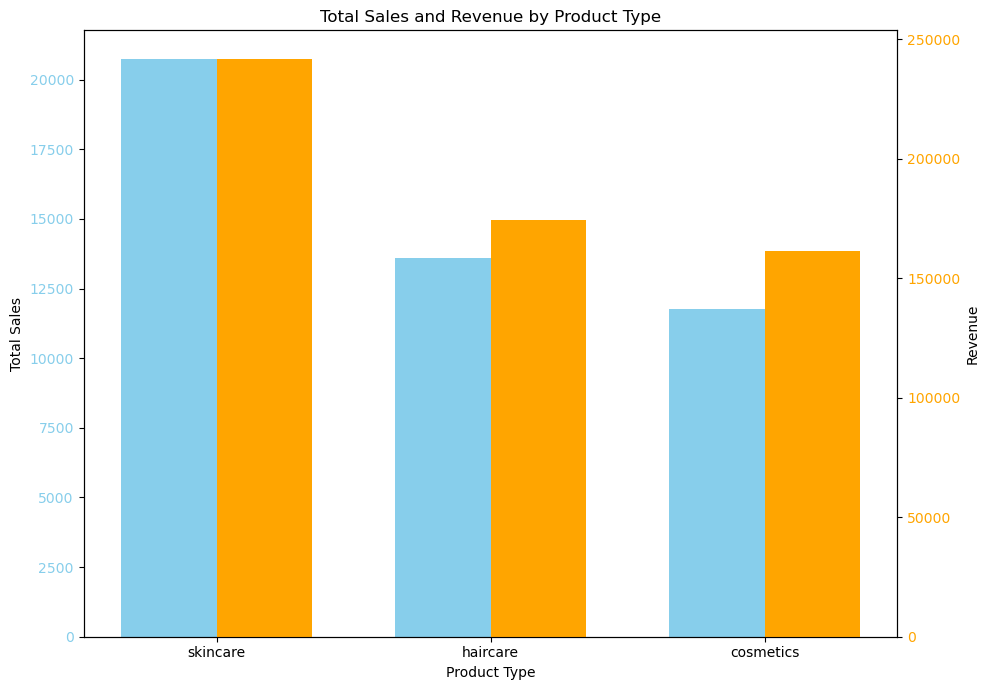

In [18]:
#Visualization
fig , ax1 = plt.subplots(figsize = (10,7))
#The first bar stands for the Total sold product
bar1 = ax1.bar(x - width/2, 'Number of products sold', data = sales_revenue , color = 'skyblue', width = width)
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis = 'y' , labelcolor = 'skyblue')

#here we created a dual Y axis duo to  the huge differences between Total sold product and Reveune 
ax2 = ax1.twinx()

#The second bar stands for the Reveune
bar2 = ax2.bar(x + width/2 , 'Revenue generated', data = sales_revenue, width = width, color = 'orange')
ax2.set_ylabel('Revenue')
ax2.tick_params(axis = 'y', labelcolor = 'orange')

plt.xticks(x, sales_revenue['Product type'])
plt.title('Total Sales and Revenue by Product Type')
fig.tight_layout()
plt.show()

**Sales and Revenue Analysis by Product Type**
The dataset reveals notable differences in sales performance across three key product categories: skincare, haircare, and cosmetics.

**1.Skincare** stands out as the top-performing category, with 20,731 units sold and generating approximately $241,628.16 in revenue. This indicates both high demand and strong revenue potential, making it the most valuable product line in the current assortment.

**2.Haircare** ranks second with 13,611 units sold, resulting in a total revenue of $174,455.39. While it trails skincare in both volume and revenue, it still represents a significant portion of overall sales.

**3.Cosmetics**, although third in line, still contributes substantially with 11,757 units sold and $161,521.27 in revenue. Despite having the lowest sales volume, it maintains a relatively high revenue, which may suggest higher price points or effective upselling strategies.

This analysis highlights **skincare** as the most dominant category in terms of both quantity sold and revenue generated, so we suggesting it may be a strategic focus area for future promotions and product development, Cosmetics may require marketing improvements to boost sales or a price adjustment to maximize profitability.

# 2.Is there a correlation between product pricing and sales volume?

In [10]:
#We used this variable to get only the numaric values on our dataset to check the correlation between them
correlation = df.select_dtypes(include = 'number').corr()

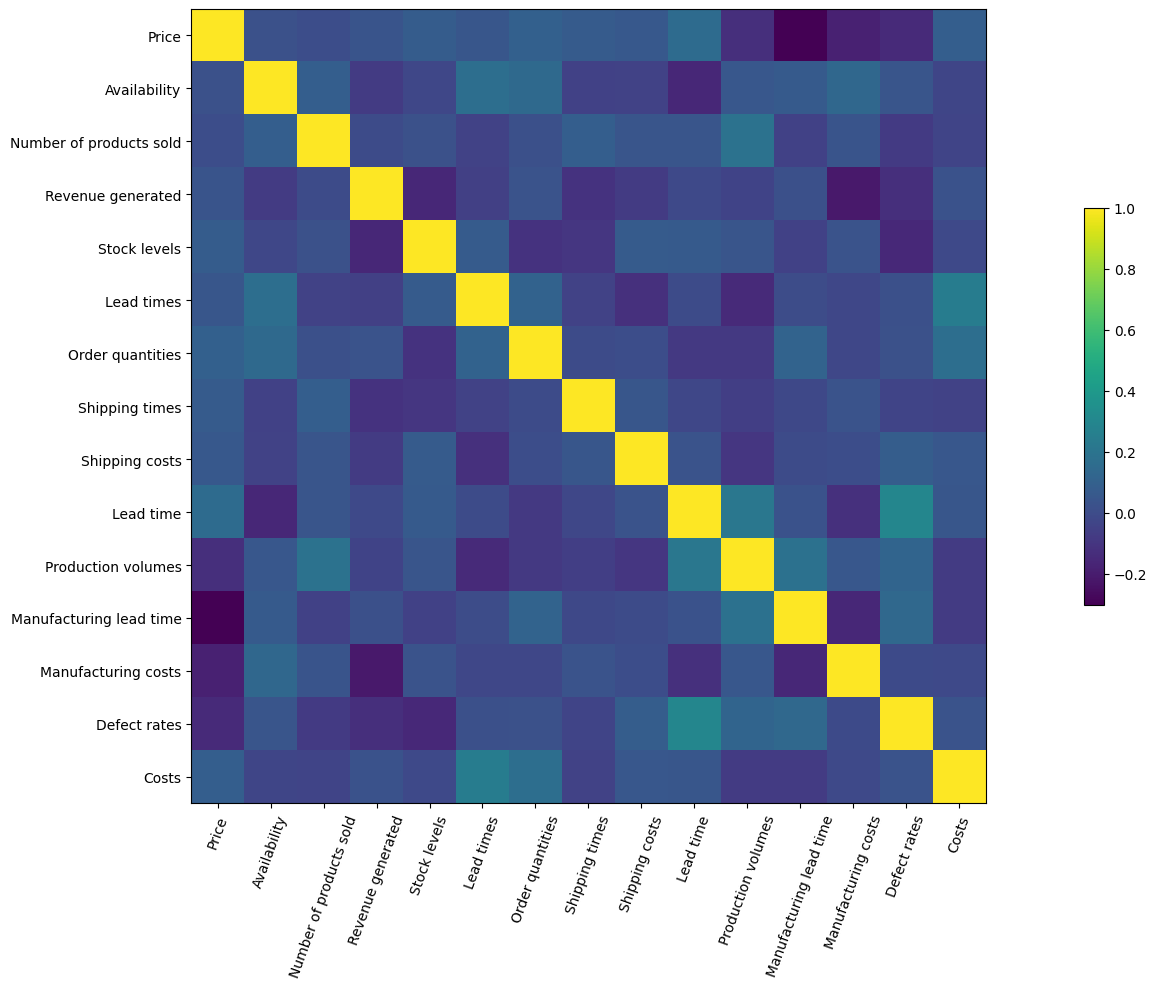

Correlation between Product Price and Sales Volume:0.01


In [11]:
#Here we will create a heatmap to find the Correlation between columns
plt.figure(figsize = (20,10))
plt.imshow(correlation)
plt.xticks(np.arange(len(correlation.columns)), labels = correlation.columns, rotation = 70)
plt.yticks(np.arange(len(correlation.index)), labels = correlation.index)
plt.colorbar(plt.imshow(correlation),shrink =  0.5)
plt.tight_layout()
plt.show()
print(f"Correlation between Product Price and Sales Volume:{df['Price'].corr(df['Number of products sold']).round(2)}")

Correlation Between Product Price and Sales Volume
The correlation coefficient between product price and sales volume is calculated to be 0.01. This value indicates a very weak positive correlation, which is statistically negligible.

In practical terms, this means that price has little to no linear relationship with the number of products sold. Higher or lower prices do not appear to significantly influence how many units are purchased. This could suggest that other factors such as brand loyalty, product quality and marketing effectiveness.

So we can suggest since price does not significantly impact sales volume, the company can focus on other strategies like marketing, product quality, and promotions rather than just pricing adjustments also the company may explore premium pricing strategies for high-demand items without fear of losing too many customers.

# 3.What is the comparison of sales quantity between Female and Male customers?

In [21]:
#Since our dataset has values like Non binary and unknown we will filter our dataset first based on Female and Male values only 
filtered_df = df[df['Customer demographics'].isin(['Female','Male'])]

#After filtering our dataset we will use it with group by function to get customer demographics(gender) and Total sales
sales_gender = filtered_df.groupby('Customer demographics')['Number of products sold'].sum().reset_index()

#We will rename our Customer demographics column to Gender and Number of products sold to Total Sales
sales_gender.rename(columns={'Customer demographics': 'Gender', 'Number of products sold': 'Total Sales'}, inplace=True)
sales_gender

,Gender,Total Sales
0,Female,12801
1,Male,7507


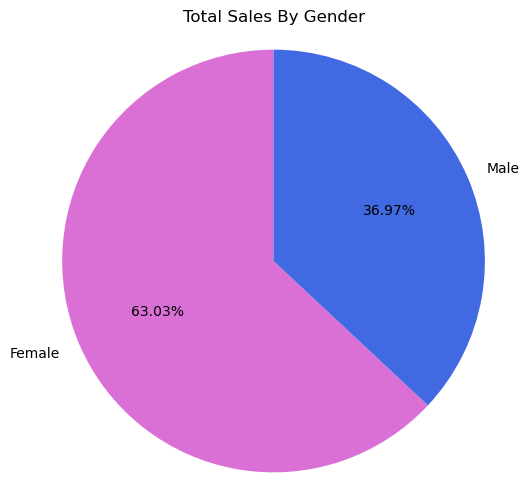

In [23]:
plt.figure(figsize = (6,6))

plt.pie('Total Sales', labels = 'Gender' , data = sales_gender, autopct = '%1.2f%%', startangle = 90, colors = ('orchid', 'royalblue'))
plt.axis('equal')
plt.title('Total Sales By Gender')
plt.show()

**Lets see the sales distribution by Gender and Product Type**

In [25]:
# Group and pivot
sales_by_gender = filtered_df.groupby(['Product type', 'Customer demographics'])['Number of products sold'].sum().unstack()\
.sort_values(by=['Female','Male'], ascending = [False,False])

# Get values for plotting
female_sales = sales_by_gender['Female'].tolist()
male_sales = sales_by_gender['Male'].tolist()
product_types = sales_by_gender.index.tolist()

In [27]:
sales_by_gender

Customer demographics,Female,Male
Product type,,
skincare,7853,2911
cosmetics,4012,2304
haircare,936,2292


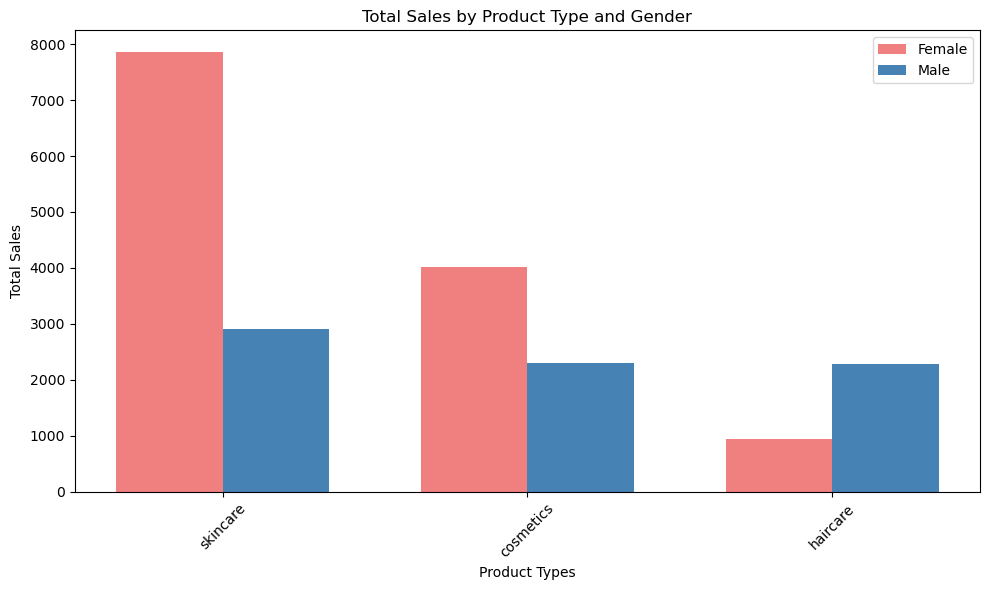

In [29]:
# Plot
x = np.arange(len(product_types))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, female_sales, width, label='Female', color='lightcoral')
ax.bar(x + width/2, male_sales, width, label='Male', color='steelblue')

ax.set_xlabel('Product Types')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Product Type and Gender')
ax.set_xticks(x)
ax.set_xticklabels(product_types, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

**Sales Volume Comparison by Gender and Product Type**
An analysis of customer demographics by product type reveals distinct purchasing patterns between female and male customers:

**Skincare** products are predominantly purchased by female customers, with 7,853 units sold to females compared to 2,911 sold to males. This shows a strong female preference for skincare items, with female sales nearly 2.7 times higher than male sales in this category.

**Cosmetics** also show a clear female majority, with 4,012 units sold to females versus 2,304 to males. While male engagement in cosmetics is notable, females still account for the majority of purchases.

**Haircare**, however, presents a different trend. Here, male customers purchased more units (2,292) than females (936). This suggests that haircare products in this dataset may be more tailored or marketed toward men, or that male consumers are more active buyers in this category.

In summary, females lead in skincare and cosmetics purchases, while males dominate haircare. These insights can inform targeted marketing strategies and product development efforts tailored to gender specific consumer behavior Such like:

•Expand product lines tailored to men (men's skincare, grooming kits,Haircare,..etc).

•Run targeted marketing campaigns for male customers.

•Offer promotions to encourage male buyers.

# 4.How do different shipping carriers compare based on shipping time and shipping cost?

In [31]:
#First we will groupby the Carriers and their avarage shipping times 
shipping_time = df.groupby('Shipping carriers')['Shipping times'].mean().reset_index().sort_values(by = 'Shipping times')
shipping_time

,Shipping carriers,Shipping times
1,Carrier B,5.302326
2,Carrier C,6.034483
0,Carrier A,6.142857


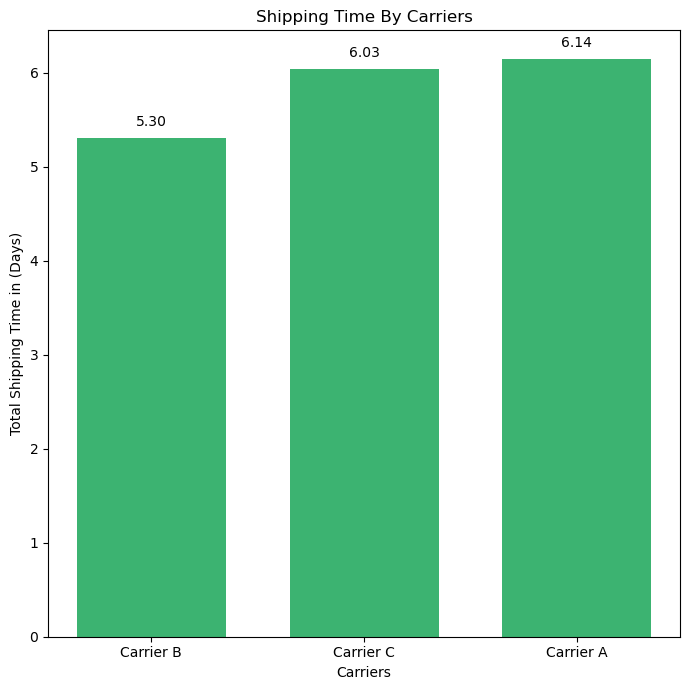

In [33]:
#visualization
plt.figure(figsize = (7,7))
plt.bar(shipping_time['Shipping carriers'], shipping_time['Shipping times'], color = 'mediumseagreen', width = 0.70)
plt.xlabel('Carriers')
plt.ylabel('Total Shipping Time in (Days)')
plt.title('Shipping Time By Carriers')
for i, v in enumerate(shipping_time['Shipping times']):
    plt.text(i, v+0.1, f'{v:.2f}', ha = 'center', va ='bottom', fontsize = 10)
plt.tight_layout()
plt.show()

In [35]:
#Second we will groupby the Carriers and their avarage shipping Costs 
shipping_cost = df.groupby('Shipping carriers')['Shipping costs'].mean().reset_index().sort_values(by = 'Shipping costs')
shipping_cost

,Shipping carriers,Shipping costs
1,Carrier B,5.509247
0,Carrier A,5.554923
2,Carrier C,5.599292


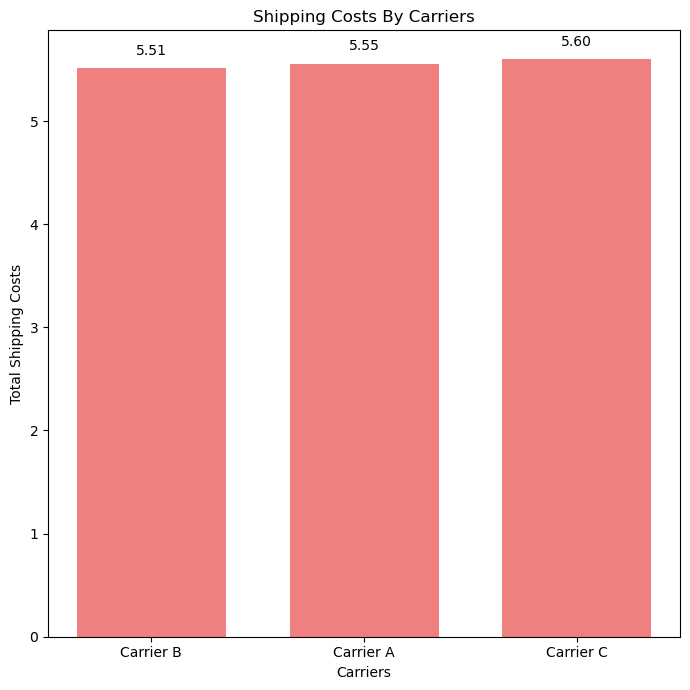

In [37]:
#Visualization
plt.figure(figsize = (7,7))
plt.bar(shipping_cost['Shipping carriers'], shipping_cost['Shipping costs'], color = 'lightcoral', width = 0.70)
plt.xlabel('Carriers')
plt.ylabel('Total Shipping Costs')
plt.title('Shipping Costs By Carriers')
for i, v in enumerate(shipping_cost['Shipping costs']):
    plt.text(i, v+0.1, f'{v:.2f}', ha = 'center', va ='bottom', fontsize = 10)
plt.tight_layout()
plt.show()

***Shipping Carrier Analysis: Time and Cost***
An evaluation of the performance of three shipping carriers—Carrier A, Carrier B, and Carrier C—reveals key differences in both shipping speed and cost efficiency.

**Shipping Time (in days):**

Carrier B has the fastest average shipping time at 5.30 days, outperforming both Carrier C (6.03 days) and Carrier A (6.14 days).

This indicates that Carrier B offers the quickest delivery service, which is a crucial factor in enhancing customer satisfaction.

**Shipping Cost (per unit shipped):**

Carrier B is also the most cost-effective, with an average shipping cost of $5.51.

Carrier A follows closely at $5.55,

While Carrier C has the highest cost at $5.60

Although the cost differences are relatively small, they can add up significantly over large volumes.

***Summary:***
Carrier B clearly stands out as the most efficient overall, providing both the fastest delivery times and the lowest average cost. In contrast, Carrier C is the least efficient, with slower deliveries and higher costs.

***Business Opportunities to Improve Shipping Performance***

**1.Prioritize Carrier B for Standard Deliveries**
Given its superior performance, Carrier B should be prioritized for most shipments to maximize speed and reduce costs, especially in high-demand or high-margin product categories.

**2.Negotiate Better Terms with Carrier C**
Carrier C is underperforming both in time and cost. Negotiating reduced rates or revised service agreements could make their offering more competitive. If not, consider reallocating their shipment volume to better-performing carriers.

**3.Implement a Carrier Performance Monitoring System**
Establish a system that regularly tracks and compares delivery times, customer feedback, and cost metrics across all carriers to enable data-driven shipping decisions.

**4.Introduce a Tiered Shipping Strategy**
Offer customers multiple shipping options (e.g., economy, standard, express), using Carrier B for express or standard, and reserving slower carriers only for non-urgent deliveries to control costs.

**5.Enhance Communication with Carriers**
Regularly share performance metrics with shipping partners. This transparency can drive improvements and foster accountability.

# 5.How do different suppliers compare based on Manufacturing costs,defect rates and production volume?

In [21]:
manu_cost = df.groupby('Supplier name')['Manufacturing costs'].sum().reset_index().sort_values(by = 'Manufacturing costs', ascending = False)
manu_cost

,Supplier name,Manufacturing costs
0,Supplier 1,1221.858734
3,Supplier 4,1128.775084
1,Supplier 2,915.695312
4,Supplier 5,805.828374
2,Supplier 3,654.511820


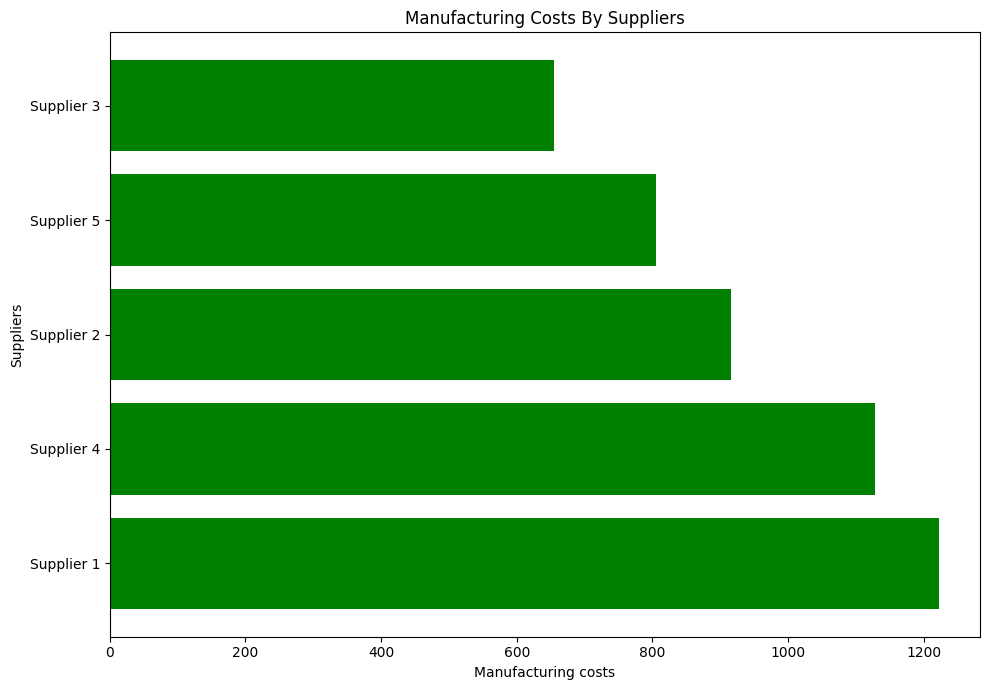

In [22]:
plt.figure(figsize=(10,7))
plt.barh('Supplier name' , 'Manufacturing costs', data = manu_cost, color = 'green')
plt.xlabel('Manufacturing costs')
plt.ylabel('Suppliers')
plt.title('Manufacturing Costs By Suppliers')
plt.tight_layout()
plt.show()


In [23]:
#SPD Stands for Suppliers By Production volume And Defect Rate

In [39]:
SPD = df.groupby('Supplier name').agg({'Production volumes' : 'sum', 'Defect rates':'mean'}).reset_index()\
.sort_values(by = ['Defect rates','Production volumes'], ascending = [True,False])

In [41]:
SPD

,Supplier name,Production volumes,Defect rates
0,Supplier 1,13545,1.803630
3,Supplier 4,11756,2.337397
1,Supplier 2,14105,2.362750
2,Supplier 3,7997,2.465786
4,Supplier 5,9381,2.665408


C:\Users\user\AppData\Local\Temp\ipykernel_2384\3150346960.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(SPD['Supplier name'], rotation = 45, ha='right')


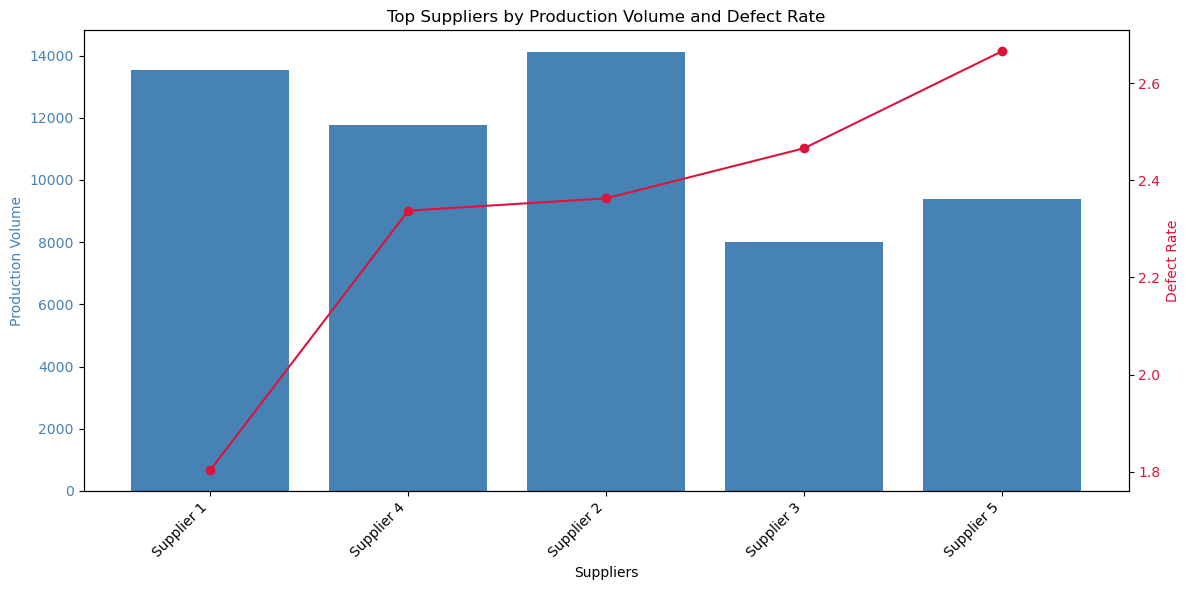

In [43]:
fig, ax1 = plt.subplots(figsize=(12,6))
#The first bar plot
ax1.bar('Supplier name', 'Production volumes', data = SPD, color = 'steelblue')
ax1.set_ylabel('Production Volume', color = 'steelblue')
ax1.set_xlabel('Suppliers')
ax1.tick_params(axis = 'y', labelcolor = 'steelblue')
ax1.set_xticklabels(SPD['Supplier name'], rotation = 45, ha='right')
#We will use dual Y axis because the huge difference between Y axis for the production and Y axis for Defect Rate
ax2 = ax1.twinx()
#The second plot
ax2.plot('Supplier name', 'Defect rates', data = SPD, color = 'crimson', marker = 'o')
ax2.set_ylabel('Defect Rate', color = 'crimson')
ax2.tick_params(axis = 'y', labelcolor = 'crimson')
#Title and layout
plt.title('Top Suppliers by Production Volume and Defect Rate')
plt.tight_layout()
plt.show()

***Supplier Performance Analysis***

Based on the previous charts we will Divide our  Key Metrics into these three parts:

**1.Cost Efficiency:**

Supplier 3 has the lowest manufacturing cost at $654.51, making it the most cost-effective supplier.

Supplier 1 has the highest manufacturing cost at $1221.86, nearly double that of Supplier 3.

**2.Production Volume:**

Supplier 2 leads with the highest production volume of 14,105 units, suggesting strong capacity.

Supplier 3 has the lowest output with 7,997 units, which may limit its scalability.

**3.Product Quality (Defect Rate):**

Supplier 1 also boasts the lowest defect rate at 1.80%, indicating superior quality control.

Supplier 5 has the highest defect rate at 2.67%, which could indicate issues in manufacturing processes or material quality.

**Balanced Performance:**

Supplier 2 strikes a balance with a moderate manufacturing cost ($915.70), high output, and a reasonable defect rate (2.36%).

***Business Improvement Opportunities:***

**Optimize Supplier Mix:**

Consider increasing orders from Supplier 1 and Supplier 2 due to its balanced performance in volume and quality.

**Negotiate Cost Reductions:**

Use Supplier 3’s low manufacturing cost as leverage in negotiations with higher cost suppliers such like Supplier 1 and Supplier4.

**Improve Quality Control:**

Work with Supplier 5 and Supplier 3 to investigate and reduce defect rates. This could involve technical training or machinery upgrades.

**Capacity Building:**

Assess if Supplier 3 and Supplier 5 can be supported to scale production, since its low cost could be highly advantageous if volumes increase.


# 6.How much does the mode of transportation affect defect rates?

In [46]:
# Group by 'Transportation Modes' and calculate average defect rates
avg_defect_rate_by_mode = df.groupby('Transportation modes')['Defect rates'].mean().reset_index()
avg_defect_rate_by_mode

,Transportation modes,Defect rates
0,Air,1.823924
1,Rail,2.318814
2,Road,2.620938
3,Sea,2.315281


<Figure size 1000x600 with 0 Axes>

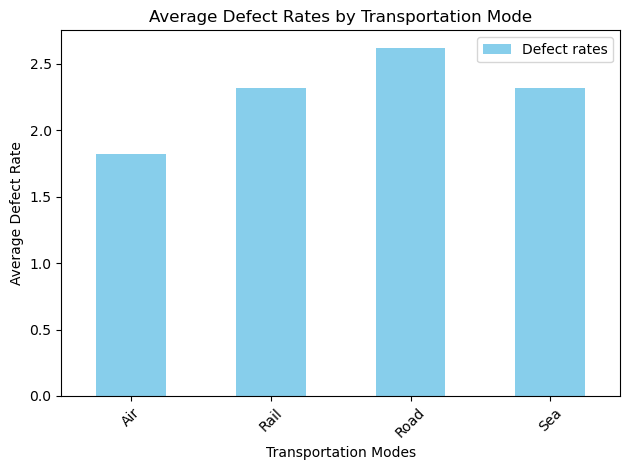

In [48]:
# Plot
plt.figure(figsize=(10,6))
avg_defect_rate_by_mode.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Defect Rates by Transportation Mode')
plt.xlabel('Transportation Modes')
plt.ylabel('Average Defect Rate')
plt.xticks(np.arange(len(avg_defect_rate_by_mode['Transportation modes'])), labels = avg_defect_rate_by_mode['Transportation modes'], rotation = 45)


# Display the plot
plt.tight_layout()
plt.show()


In [50]:
# Group by 'Transportation Mode' and calculate the average cost
avg_cost_by_mode = df.groupby('Transportation modes')['Costs'].mean().reset_index()
avg_cost_by_mode

,Transportation modes,Costs
0,Air,561.712596
1,Rail,541.747556
2,Road,553.385988
3,Sea,417.819148


<Figure size 1000x600 with 0 Axes>

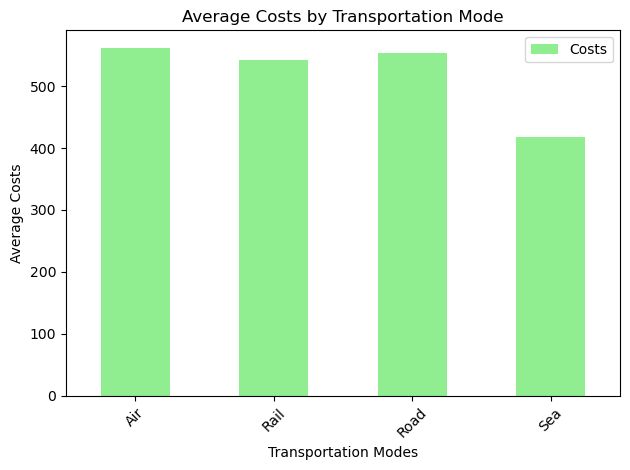

In [52]:
# Plot
plt.figure(figsize=(10, 6))
avg_cost_by_mode.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.title('Average Costs by Transportation Mode')
plt.xlabel('Transportation Modes')
plt.ylabel('Average Costs')
plt.xticks(np.arange(len(avg_defect_rate_by_mode['Transportation modes'])), labels = avg_defect_rate_by_mode['Transportation modes'], rotation = 45)

# Display the plot
plt.tight_layout()
plt.show()

***Transportation Mode Analysis***

We will evaluate our four transportation modes Air, Rail, Road, and Sea based on two key metrics: cost and defect rates.

**Cost Overview:**

Sea transport is the most cost-effective at $417.82 per shipment, making it ideal for cost-sensitive logistics.

Air transport is the most expensive at $561.71, typically expected due to its speed and urgency.

**Defect Rates:**

Air again stands out with the lowest defect rate at 1.82%, suggesting minimal handling and faster transit reduce the risk of damage.

Road transport has the highest defect rate at 2.62%, possibly due to longer travel times, traffic-related delays, or poor road conditions.

**Balanced Options:**

Rail and Sea offer moderate defect rates (2.31%) and are more cost-efficient than Air and Road, making them strong candidates for bulk, non-urgent shipments.

***Business Improvement Opportunities:***

**Optimize Transport Mode by Product Type:**

Use Air transport for high-value, fragile, or urgent goods, where low defect rates justify higher costs.

Employ Sea or Rail transport for bulk, low margin products to maximize cost efficiency while keeping defect rates manageable.

**Reduce Road Transport Reliance:**

Given its high cost and defect rate, consider shifting volumes from Road to Rail or Sea where possible.

**Quality Improvement Programs:**

If Road transport is unavoidable in certain regions, invest in better packaging or partner with more reliable carriers to lower damage rates.

**Monitor and Audit Logistics Partners:**

Regularly audit logistics partners across all transport modes to identify areas for training, route optimization, or contract renegotiation.

